<a href="https://colab.research.google.com/github/Vizzeyly/Hamoye-2022-Selenium-Group/blob/Abu_umar/Selenium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Foreign Exchange Rates 2000-2019**


This is a notebook by Hamoye 2022 Summer Intership Premiere Project **[Selenium Group]**

In recent years, a common problem of the majority of the world is inflation. The American dollar is often used as measure for the value of a country’s 
currency. In this project, the UK pound was used as a case study to get a general idea of the effects of inflation and to forecast the values of the country currency in the years to come.

This Notebook makes use of several Python libraries like Pandas (for Data Cleaning/Manipulation), MatPlotlib (for Data Exploration), Plotly (for some Data Visualisation), Scikit-learn (for Building Machine Learning Model) etc.

# **Contents**


1.   Import Libraries

2.   Data Sourcing

3.   Data Wrangling

4.   Exploratory Data Analysis

5.   Model Training

6.   Model Evaluation



# **1- Import Libraries**

Import all the necessaries libraries to be used in this notebook. The group prefer to do this at the initial stage and added more libraries as the project progresses. These section was done is two aspect, the libraries installation and libraries import.

**1.1 Libraries installed**

**plotly_express** is a high-level interface to plotly that can be used for interactive visualizations and plots with a variety of data.

In [ ]:
pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Pip install pystan** AND **pip install fbprophet**: These libraries are required to use the Prophet model that is already available under the fbprophet library.

In [ ]:
!pip install pystan~=2.14

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**1.2 Import**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from plotly import tools
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import uniform

import scipy
import statsmodels
from scipy.stats import boxcox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace import sarimax
from statsmodels.tsa.seasonal import seasonal_decompose

from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from fbprophet import Prophet
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, r2_score,mean_absolute_error,mean_squared_error

from random import randrange
import warnings 
warnings.filterwarnings('ignore')

print("Setup Completed!!!")

Setup Completed!!!


# **2. Data Sourcing**

For this project we were able to get a foreign exchange dataset from Kaggle and Pandas library was used to load the dataset as a comma separated values(csv) file format which was downloaded from Kaggle to our machine.

In [ ]:
df = pd.read_csv('/content/Foreign_Exchange_Rates.csv')

# **3. Data Wrangling**

In [ ]:
df.head()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [ ]:
print("There are {} rows and {} columns in the dataset.".format(df.shape[0], df.shape[1]))


There are 5217 rows and 24 columns in the dataset.


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.columns

Index(['Time Serie', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$'],
      dtype='object')

Let's extract one country's data and try to understand its behaviour. We'll take UK for illustration purpose. All our EDA and model building will revolve around UK.

In [ ]:
data = df[['Time Serie', 'UNITED KINGDOM - UNITED KINGDOM POUND/US$']]
data.columns = ['date', 'rate']

In [ ]:
data.head(15)

,date,rate
0,2000-01-03,0.6146
1,2000-01-04,0.6109
2,2000-01-05,0.6092
3,2000-01-06,0.607
4,2000-01-07,0.6104
5,2000-01-10,0.6107
6,2000-01-11,0.6068
7,2000-01-12,0.6073
8,2000-01-13,0.6067
9,2000-01-14,0.6115


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    5217 non-null   object
 1   rate    5217 non-null   object
dtypes: object(2)
memory usage: 81.6+ KB


In [ ]:
data.rate.describe()

count     5217
unique    2303
top         ND
freq       198
Name: rate, dtype: object

In [ ]:
data.nunique()

date    5217
rate    2303
dtype: int64

**Note: **We can see that we have some value '**ND**' in our dataset. Let's remove these values to ensure we are able to make forecasting accurately. We are not sure of what ND means (Maybe it stands for No Data).

Remove rates with a value of ND.

In [ ]:
data = data.drop(data[data['rate']=='ND'].index)

On looking at the datatype for our variables using the .info() method, we see that both the variables are of Object type. In order to perform our analysis, we’ll have to change the datatypes of both the columns.


In [ ]:
data['rate'] = pd.to_numeric(data.rate)
data['date'] = pd.to_datetime(data.date)

Sort values by date. This is important as the values should always be in ascending order to make forecasts.


In [ ]:
data = data.sort_values('date', ascending=True)

In [ ]:
data1 = data.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5019 entries, 0 to 5216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5019 non-null   datetime64[ns]
 1   rate    5019 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 117.6 KB


# **3. Exploratory Data Analysis**

In [ ]:
data.set_index('date',inplace=True)

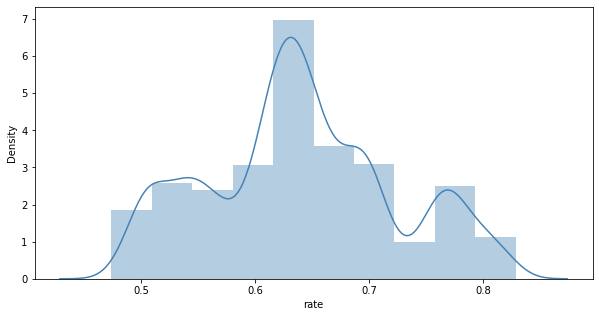

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(data.rate, bins=10, color='steelblue')

From the above graph, we can see that our UK Exchange Rates follows more or less a Gaussian Distribution.


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data.index, y=data.rate, marker_color='lightgreen'))

fig.update_layout(title='TIME-SERIES PLOT OF UNITED KINGDOM POUND RATE', 
                  height=450, width=1000, template='plotly_dark', font_color='lightgreen', 
                  font=dict(family="sans serif",
                            size=16,
                            color="grey"
                            ))

fig.update_xaxes(title='Date')
fig.update_yaxes(title='Rate / $')
fig.show()

On looking at the line plot for the above data, we can see that the data is non-stationary, with a trend in the dataset, but not observable Seasonality.

Thus, We'll choose additive instead of multiplicative since there is no exponential increase in the amplitudes over time.


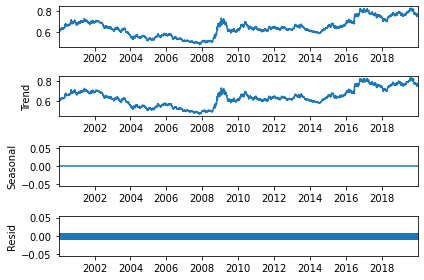

In [ ]:
sdec = seasonal_decompose(data, model='additive', freq = 1)
sdec.plot();

Similiarly, We'll choose additive instead of multiplicative since there is no exponential increase in the amplitudes over time.


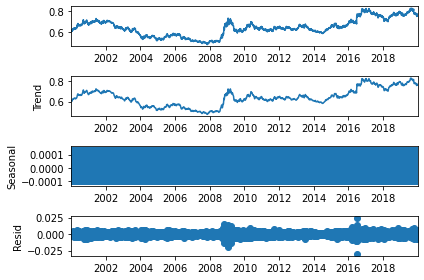

In [ ]:
sdec = seasonal_decompose(data, model='additive', freq = 5)
sdec.plot();

As seen above, we uses seasonal_decompose() method to break down the time-series into 3 parts, namely random, trend, and seasonality. We see that there is randomness and trend in the data, there is no seasonality component

It is pretty clear from the decomposition that there is no seasonal component in our Time Series.


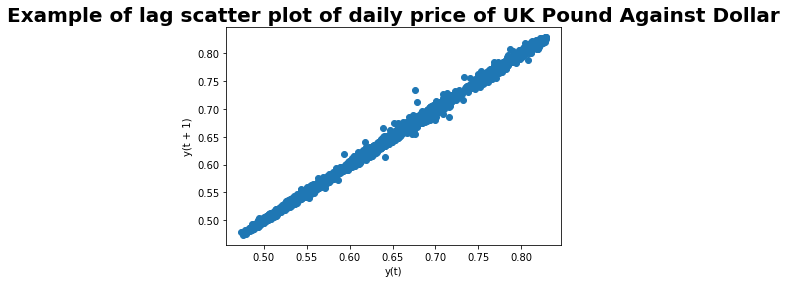

In [ ]:

lag_plot(series = data.rate)
plt.title('Example of lag scatter plot of daily price of UK Pound Against Dollar', weight='bold', family='Arial', fontsize=20)
plt.show()

Notes:
*   From the above lag plot, we can see that the values of exchange rates at time period t and t+1 are highly positively correlated which is evident
*   From the coalesced datapoints moving from left to right upwards. This means that the values are highly dependent on the previous values.

In [ ]:
values = pd.DataFrame(data.rate.values)
lags = 7
columns = [values]

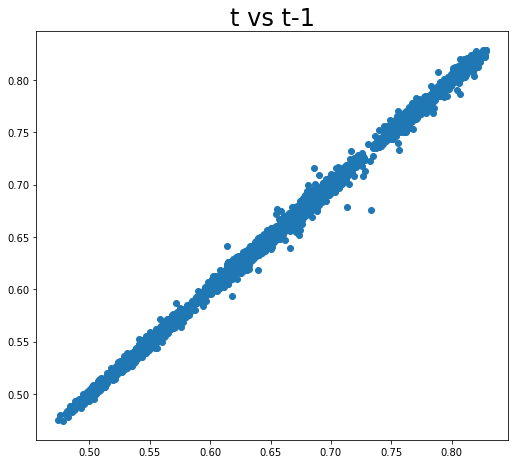

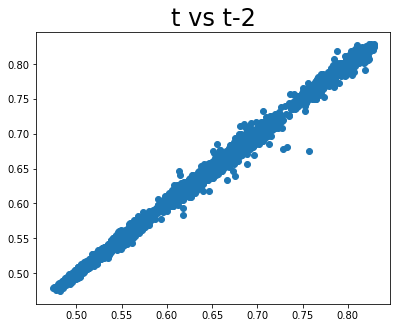

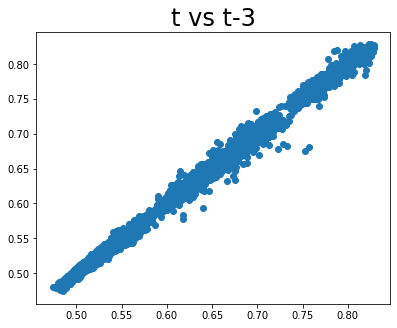

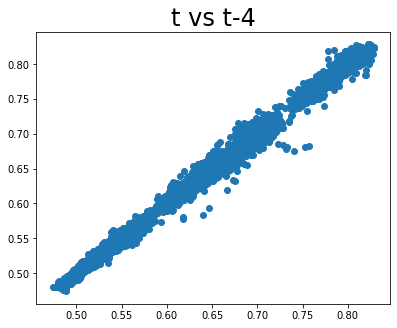

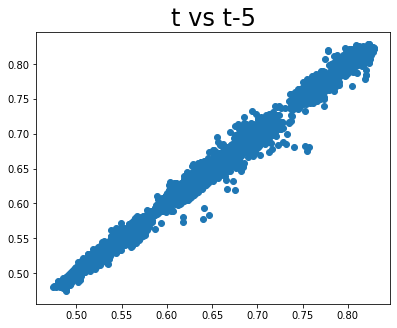

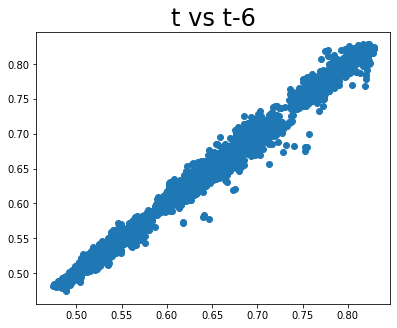

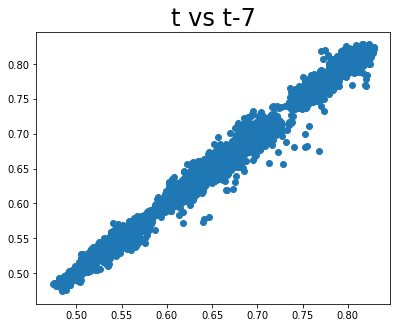

In [ ]:
for i in range(1,(lags + 1)):
  columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)

columns = ['t']

for i in range(1,(lags + 1)):
  columns.append('t-' + str(i))

dataframe.columns = columns

plt.figure(1, figsize=(8,6))

for i in range(1, (lags+1)):
  ax = plt.subplot(240 + i)
  plt.subplots_adjust(left = 0.1, bottom=0.1, right=1.9, top =2, wspace = -0.6, hspace = 0.01)
  ax.set_title('t vs t-' + str(i), family = 'Arial', fontsize = 24)
  plt.scatter(x = dataframe['t'].values, y = dataframe['t-'+str(i)].values)
  plt.show()

As seen above, to identify how strong the correlation is between the series at time t and its lags (t-1,t-2, etc.), we used the lag_plot() method to plot the values. The values were plotted for a total of 7 lags, and we can see that there is strong correlation between the values at time t with each lag period.

As we can also see from above lag plots, for 7 different lag values, there is high positive correlation among each one of them with values at time t.

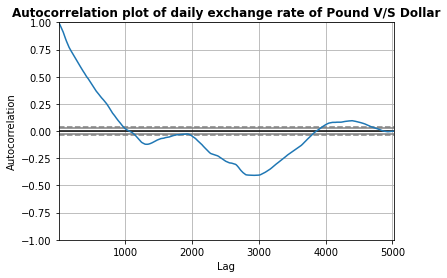

In [ ]:
pd.plotting.autocorrelation_plot(data.rate)
plt.title('Autocorrelation plot of daily exchange rate of Pound V/S Dollar', weight='bold', family='Arial', fontsize=12)
plt.show()

From the above AC plot, we can see that the initial lag values show a correlation with previous values. But it starts decreasing as time passes and becomes negative for a while. But for most of the part, it remains close to zero for higher values, which shows no correaltion.

Let's perform ADF Test to confirm stationarity/non-stationarity of our dataset.


In [ ]:

result = adfuller(data['rate'].tolist())
print('ADF Statistic: %f' % result[0])
print('p-value %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.219928
p-value 0.664965
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


<Figure size 864x432 with 0 Axes>

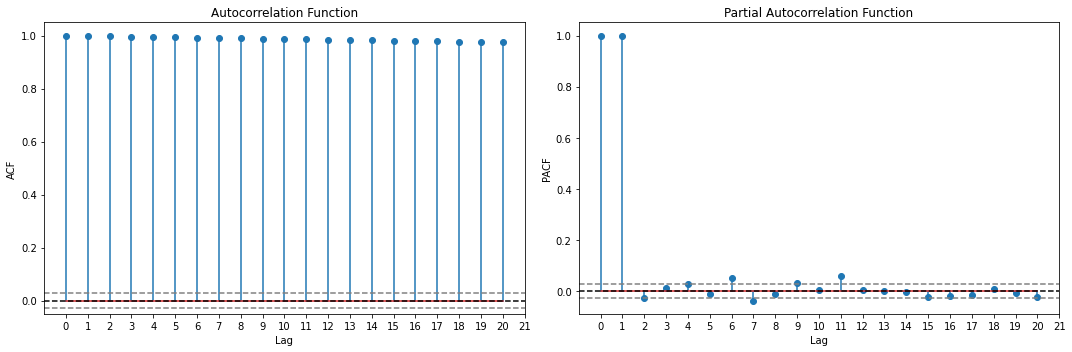

In [ ]:
plt.figure(figsize=(12,6))
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(data.rate, nlags = 20)
lag_pacf = pacf(data.rate, nlags = 20, method = 'ols')

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.xticks(range(0,22,1))
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color='black')
plt.axhline(y = -1.96/np.sqrt(len(data)), linestyle = '--', color='gray')
plt.axhline(y = 1.96/np.sqrt(len(data)), linestyle = '--', color='gray')
plt.xlabel('Lag')
plt.xticks(range(0,22,1))
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

*   Since our Test Statistic value is greater than our critical value at 5%, we can say that our time series is non-stationarity.

*   We can also see from our ACF plot that there is high correlation between time series at time t and various other lag values. There is also no sign of any kind of seasonality.

Thus, we will difference our series once to see if this removes stationarity.

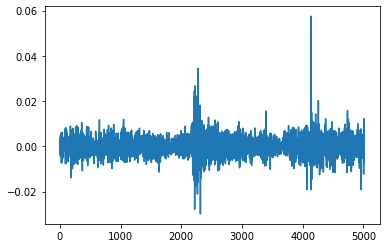

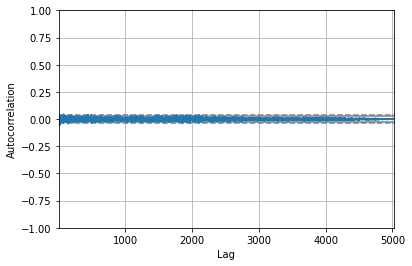

In [ ]:
diff = list()
for i in range(1, len(data)):
  value = data['rate'].tolist()[i] - data['rate'].tolist()[i-1]
  diff.append(value)

# line plot

plt.plot(diff)
plt.show()

# Auto-correlation plot

pd.plotting.autocorrelation_plot(diff)
plt.show()

Now let's plot our ACF and PACF plots.


<Figure size 864x432 with 0 Axes>

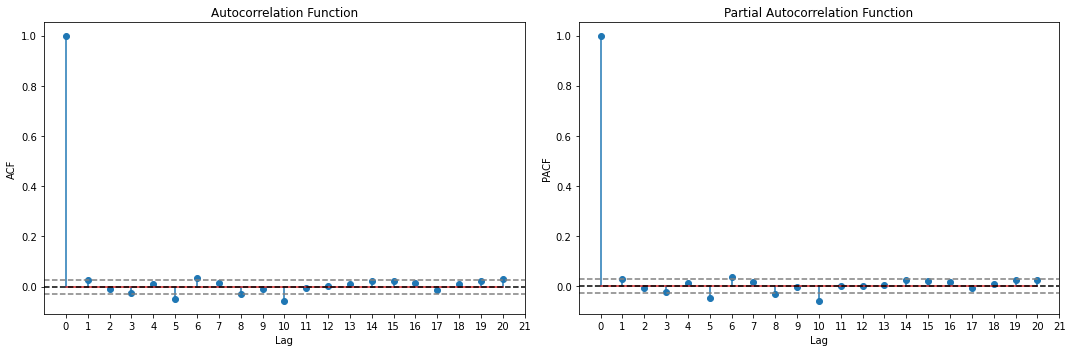

In [ ]:
plt.figure(figsize=(12,6))

lag_acf = acf(diff, nlags = 20)
lag_pacf = pacf(diff, nlags = 20, method = 'ols')

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.xticks(range(0,22,1))
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color='black')
plt.axhline(y = -1.96/np.sqrt(len(diff)), linestyle = '--', color='gray')
plt.axhline(y = 1.96/np.sqrt(len(diff)), linestyle = '--', color='gray')
plt.xlabel('Lag')
plt.xticks(range(0,22,1))
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

Notes:
*  From the first line plot, we can see that the differenced time series has a mean close to 0 and a very small variance.

*  This shows us that the data has become stationary now. Also, from the autocorrelation plot, we can see that the AC values at different lags are now close to zero. This is also a sign of stationarity. But we'll again run the ADF test to check for stationarity.

Let's run the ADF test again after differencing.

In [ ]:
result = adfuller(diff)

print('ADF Statistic: %f' % result[0])
print('p-value %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.503825
p-value 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


Yey, we can see that our p-value is now approximately close to 0, so we can say that our time-series is now stationary.


# **4. Model Training**

We will now be looking to build 3 models, namely ARIMA, SARIMAX, and Prophet.

But before we start building our model, we will need the appropriate values of p,d,q for the models ARIMA and SARIMAX.

1. We know, the value of p is obtained from the PACF plot, d is the number of times we have differenced our time-series (which is 1 in this case), and q is obtained from the ACF plot.

2. On plotting our ACF and PACF plots with the differenced data (also called as lollipop charts), we can see that the p and q values turn out to be 10 for both. We identify the p and q values by identifying where the lollipops are out of the band of error, which shows the significant values. Any value inside the band is treated as insignificant.

Split the dataset into train and validation.

In [ ]:
X_train, X_val = data1[:-30], data1[-30:]

print('X_train Shape: ', X_train.shape)
print('X_val Shape: ', X_val.shape)

X_train Shape:  (4989, 2)
X_val Shape:  (30, 2)


# **4.1 Linear Regression Model**

In [ ]:
data2 = data.copy()

In [ ]:
time = [i+1 for i in range(len(data2))]
data2['time'] = time

In [ ]:
data2.head()

,rate,time
date,,
2000-01-03,0.6146,1
2000-01-04,0.6109,2
2000-01-05,0.6092,3
2000-01-06,0.6070,4
2000-01-07,0.6104,5


In [ ]:
train = data2[0: int(len(data2) * 0.7)]
test = data2[int(len(data2) * 0.7): ]

Split data into train and test set.

In [ ]:
X_train = train.drop('rate',axis=1)
X_test = test.drop('rate',axis=1)
y_train = train[['rate']]
y_test = test[['rate']]

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#Define model
model = LinearRegression()

#fit model
model.fit(X = X_train, y = y_train)

LinearRegression()

In [ ]:
#predict model
predictions = model.predict(X_test)

In [ ]:
y_test['RegOnTime'] = predictions

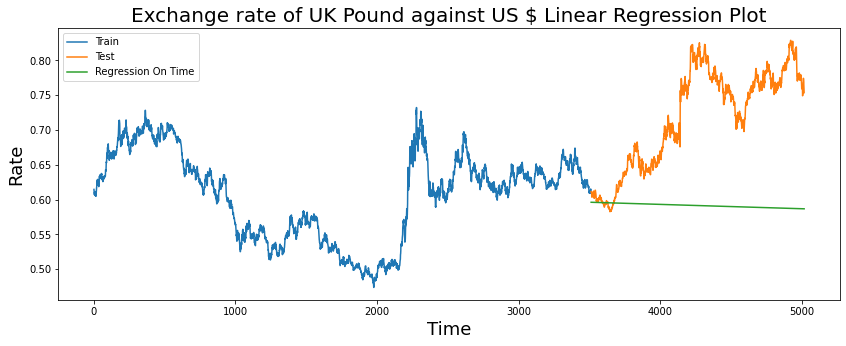

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_train['rate'].values, label = 'Train')   
plt.plot([None for i in y_train.values] + [x for x in y_test['rate'].values], label = 'Test')
plt.plot([None for i in y_train.values] + [x for x in y_test['RegOnTime'].values], label = 'Regression On Time')
plt.title('Exchange rate of UK Pound against US $ Linear Regression Plot', family='Arial', fontsize=20)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Rate', fontsize=18)
plt.legend(loc = 'best')

# **4.2 ARIMA MODEL**

In [ ]:
X_train, X_val = data1[:-30], data1[-30:]

print('X_train Shape: ', X_train.shape)
print('X_val Shape: ', X_val.shape)

X_train Shape:  (4989, 2)
X_val Shape:  (30, 2)


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
predictions = []

arima = ARIMA(X_train.rate,order=(10,1,10)).fit()

Get a 30 days prediction.

In [ ]:
predictions.append(arima.forecast(30))

converting and reshaping 

In [ ]:
predictions = np.array(predictions[0][0]).reshape((30,))

In [ ]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.rate   No. Observations:                 4988
Model:               ARIMA(10, 1, 10)   Log Likelihood               20651.012
Method:                       css-mle   S.D. of innovations              0.004
Date:                Wed, 24 Aug 2022   AIC                         -41258.023
Time:                        06:44:10   BIC                         -41114.698
Sample:                             1   HQIC                        -41207.784
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.279e-05   5.39e-05      0.608      0.543   -7.29e-05       0.000
ar.L1.D.rate     -0.0756      0.086     -0.881      0.378      -0.244       0.092
ar.L2.D.rate      0.1525      0.047      3.275      0.001       0.061       0.244
ar.L3.D.rate     -0.4678      0.085     -5.509      0.000      -0.634      -0.301
ar.L4.D.rate     -0.2094      0.120     -1.744      0.081      -0.445       0.026
ar.L5.D.rate      0.1370      0.114      1.200      0.230      -0.087       0.361
ar.L6.D.rate     -0.3244      0.059     -5.477      0.000      -0.440      -0.208
ar.L7.D.rate     -0.3159      0.135     -2.345      0.019      -0.580      -0.052
ar.L8.D.rate      0.0942      0.084      1.118      0.264      -0.071       0.259
ar.L9.D.rate     -0.2175      0.065     -3.326      0.001      -0.346      -0.089
ar.L10.D.rate    -0.7358      0.061    -12.132      0.000      -0.855      -0.617
ma.L1.D.rate      0.1008      0.077      1.316      0.188      -0.049       0.251
ma.L2.D.rate     -0.1484      0.043     -3.474      0.001      -0.232      -0.065
ma.L3.D.rate      0.4473      0.083      5.379      0.000       0.284       0.610
ma.L4.D.rate      0.2240      0.113      1.981      0.048       0.002       0.446
ma.L5.D.rate     -0.1748      0.103     -1.705      0.088      -0.376       0.026
ma.L6.D.rate      0.3486      0.063      5.517      0.000       0.225       0.472
ma.L7.D.rate      0.3402      0.128      2.667      0.008       0.090       0.590
ma.L8.D.rate     -0.1359      0.074     -1.847      0.065      -0.280       0.008
ma.L9.D.rate      0.2162      0.057      3.808      0.000       0.105       0.328
ma.L10.D.rate     0.7120      0.057     12.578      0.000       0.601       0.823
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9276           -0.4019j            1.0109           -0.0651
AR.2             0.9276           +0.4019j            1.0109            0.0651
AR.3             0.5905           -0.8302j            1.0188           -0.1516
AR.4             0.5905           +0.8302j            1.0188            0.1516
AR.5             0.0643           -1.0249j            1.0269           -0.2400
AR.6             0.0643           +1.0249j            1.0269            0.2400
AR.7            -0.7317           -0.7690j            1.0615           -0.3710
AR.8            -0.7317           +0.7690j            1.0615            0.3710
AR.9            -0.9985           -0.2854j            1.0384           -0.4557
AR.10           -0.9985           +0.2854j            1.0384            0.4557
MA.1             0.9331           -0.4043j            1.0169           -0.0651
MA.2             0.9331           +0.4043j            1.0169            0.0651
MA.3     

Prediction graph

Text(0, 0.5, 'Rate')

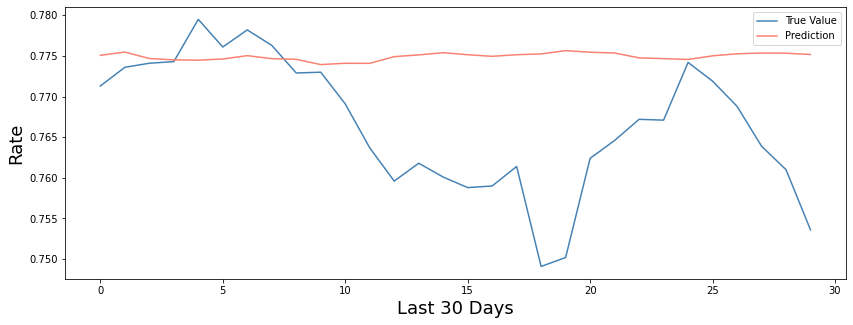

In [ ]:
y_val = data.rate[-30:]
plt.figure(figsize=(14,5))
plt.plot(np.arange(len(y_val)), y_val, color='steelblue')
plt.plot(np.arange(len(y_val)), predictions, color='salmon')
plt.legend(['True Value', 'Prediction'])
plt.xlabel('Last 30 Days', fontsize=18)
plt.ylabel('Rate', fontsize=18)

# **4.3 FB-prophet Model**

In [ ]:
data1 = data1.rename(columns={'date' : 'ds','rate' : 'y'})

In [ ]:
data1.shape

(5019, 2)

In [ ]:
data1.head()

,ds,y
0,2000-01-03,0.6146
1,2000-01-04,0.6109
2,2000-01-05,0.6092
3,2000-01-06,0.6070
4,2000-01-07,0.6104


Get one year data

In [ ]:
training_data = data1[data1['ds']<='2018-12-31']
testing_data = data1[data1['ds']>='2019-01-01']

In [ ]:
training_data.tail()

,ds,y
4949,2018-12-21,0.7886
4952,2018-12-26,0.7889
4953,2018-12-27,0.7920
4954,2018-12-28,0.7875
4955,2018-12-31,0.7835


In [ ]:
testing_data.head()

,ds,y
4957,2019-01-02,0.7938
4958,2019-01-03,0.7916
4959,2019-01-04,0.7849
4960,2019-01-07,0.7839
4961,2019-01-08,0.7859


In [ ]:
training_data.shape

(4770, 2)

In [ ]:
testing_data.shape

(249, 2)

In [ ]:
prophet = Prophet()
prophet.fit(training_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_dates = prophet.make_future_dataframe(periods=249, freq='D', include_history=False)


In [ ]:
prediction = prophet.predict(future_dates)


Prediction graph.

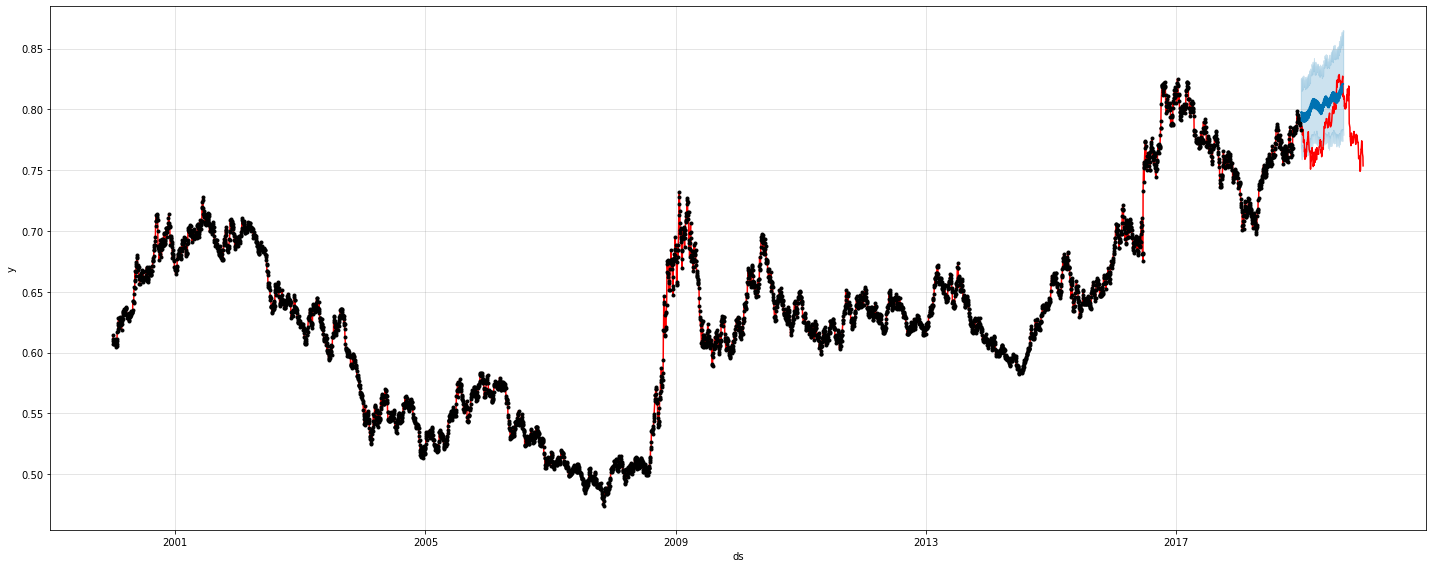

In [ ]:
fig,axes = plt.subplots(figsize=(20,8))

plt.plot(data1.ds,data1.y,axes=axes,color='red')
prophet.plot(prediction, ax=axes)
plt.show()

In [ ]:
temp = prediction[['ds','yhat']].rename(columns={
    'yhat' : 'y'
})

In [ ]:
temp

,ds,y
0,2019-01-01,0.797612
1,2019-01-02,0.797643
2,2019-01-03,0.797443
3,2019-01-04,0.797734
4,2019-01-05,0.790312
...,...,...
244,2019-09-02,0.821089
245,2019-09-03,0.821283
246,2019-09-04,0.821175
247,2019-09-05,0.820824


# **5. Model Evaluation**

Define a function what for MAPE

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

5.1 Linear Regression model evaluation

In [ ]:
#MODEL MATRIC EVALUATION
reg_mae = mean_absolute_error(y_test.rate,y_test.RegOnTime)
reg_mse = mean_squared_error(y_test.rate,y_test.RegOnTime)
reg_rmse = np.sqrt(mean_squared_error(y_test.rate,y_test.RegOnTime))

print('Mean Absolute Error:   ', reg_mae)
print('Mean Squared Error:   ', reg_mse)
print('Root Mean Squared Error:   ', reg_rmse)
print("The MAPE of Linear Regression Model is: ", round(mean_absolute_percentage_error(y_test.rate,y_test.RegOnTime),2), "%")



Mean Absolute Error:    0.12699153284438436
Mean Squared Error:    0.02134323265984055
Root Mean Squared Error:    0.1460932327653836
The MAPE of Linear Regression Model is:  16.82 %


5.2 ARIMA model evaluation

In [ ]:
arima_mae = mean_absolute_error(y_val, predictions)
arima_mse = mean_squared_error(y_val, predictions)
arima_rmse = np.sqrt(mean_squared_error(y_val, predictions))

print('Mean Absolute Error:   ', arima_mae)
print('Mean Squared Error:   ', arima_mse)
print('Root Mean Squared Error:   ', arima_rmse)
print("The MAPE of ARIMA Model is: ", round(mean_absolute_percentage_error(y_val,predictions),2),"%")



Mean Absolute Error:    0.00911962518815496
Mean Squared Error:    0.00013792694963296717
Root Mean Squared Error:    0.011744230482793123
The MAPE of ARIMA Model is:  1.2 %


5.3 Prophet model evaluation

In [ ]:
prophet_mae = mean_absolute_error(testing_data.y,temp.y)
prophet_mse = mean_squared_error(testing_data.y,temp.y)
prophet_rmse = np.sqrt(mean_squared_error(testing_data.y,temp.y))

print('Mean Absolute Error:   ', prophet_mae)
print('Mean Squared Error:   ', prophet_mse)
print('Root Mean Squared Error:   ', prophet_rmse)
print("The MAPE of Prophet Model is: ", round(mean_absolute_percentage_error(testing_data.y,temp.y),2), "%")


Mean Absolute Error:    0.02552403425591412
Mean Squared Error:    0.0009142908681409921
Root Mean Squared Error:    0.030237243064489067
The MAPE of Prophet Model is:  3.3 %


**Conclusion:**

We can clearly see that out of the 3 models we built, **ARIMA MODEL** is giving us the best results with the lowest Evaluation Matric of MAE,MSE,RMSE and MAPE respectively.

# ***THANK YOU FOR TAKING TIME TO STUDY OUR NOTEBOOK. WE HOPE YOU GOT SOME INSIGHTS.***